## <font color='darkblue'>Preface</font>
([article source](https://towardsdatascience.com/https-towardsdatascience-com-multicollinearity-how-does-it-create-a-problem-72956a49058)) **<font size='3ptx'>Understand in-depth how multicollinearity can affect the model’s performance</font>**

During regression analysis, we check many things before actually performing regression forehand. We check if the independent values are correlated, we check if the feature we are selecting is significant or not and also if there are any missing values and if yes then how to handle them.

First, let’s understand what Dependent and Independent Variables are
* **Dependent variables**, the value which has to be predicted during regression. Also, known as the target value.
* **Independent variables**, the values which we have to use to predict the target value or dependent variable. Also, known as predictors.

If we have an equation like this
```python
y = w*x
```
Here, `y` is the dependent variable and `w` is the independent variable.

We’ll see later how it is detected but first, let’s see <font color='darkred'>**what problem will be there if variables are correlated.**</font>

## <font color='darkblue'>Understanding Conceptually </font>
Imagine you went to watch a rock band’s concert. There are 2 singers, a drummer, a keyboard player, and 2 guitarists. You can easily differentiate between the voice of singers as one is male and other is female but you seem to have trouble telling who is playing better guitar.

Both guitarists are playing on the same tone, same pitch and at the same speed. If you could remove one of them then it wouldn’t be a problem since both are almost same.

The benefit of removing one guitarist is cost-cutting and fewer members in the team. In machine learning, it is fewer features for training which leads to a less complex model.

Here both guitarists are collinear. If one plays the guitar slowly then another guitarist also plays the guitar slowly. If one plays faster then other also plays faster.

**If two variables are collinear that means if one variable increases then other also increase and vice-versa.**

## <font color='darkblue'>Understanding Mathematically</font>
Let’s consider the equation. Consider `A` and `B` are highly correlated:
```python
y = w1*A + w2*B
```

The coefficient `w1` is the increase in `y` for every unit increase in `A` while holding `B` constant. But practically it not possible since `A` and `B` are correlated and if `A` increases by unit then `B` also increase by some unit. Hence, we cannot check the individual contribution of either `A` or `B`. The solution is to remove either of them.

### <font color='darkgreen'>Checking for Multicollinearity </font>
There are 2 ways multicollinearity is usually checked:
* Correlation Matrix
* Variance Inflation Factor (VIF)

**<font color='darkblue'>Correlation Matrix</font>** — A correlation matrix is a table showing correlation coefficients between variables. We are not going to cover how the correlation matrix is calculated. Below is a simple example:

In [25]:
import pandas as pd
import seaborn as sns
import numpy as np
import random
import matplotlib.pyplot as plt

df = pd.DataFrame([[random.randint(0,10), random.randint(0,10)] for i in range(20)], columns=['hp', 'wt'])
df.head(n=10)

,hp,wt
0,10,9
1,10,0
2,4,7
3,3,7
4,8,6
5,9,9
6,9,10
7,0,6
8,8,5
9,6,7


In [28]:
df['disp'] = df['hp'] * 0.85 + random.random() * 0.1 + df['wt'] * -0.6
df['qsec'] = [random.randint(5,10) * random.random() for i in range(20)]
df['drat'] = df['hp'] * 0.4 + random.random() * 0.5
df['mpg'] = df['wt'] * -0.3 + random.random() * 2
df.head()

,hp,wt,disp,qsec,drat,mpg
0,10,9,3.151936,2.677579,4.030054,-2.069039
1,10,0,8.551936,9.019888,4.030054,0.630961
2,4,7,-0.748064,2.244090,1.630054,-1.469039
3,3,7,-1.598064,0.522797,1.230054,-1.469039
4,8,6,3.251936,0.290607,3.230054,-1.169039


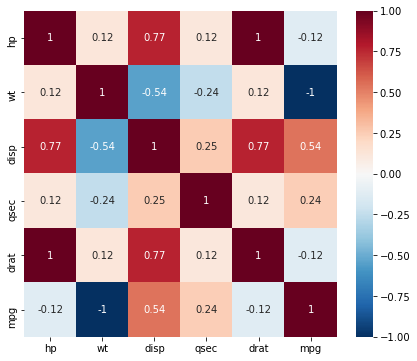

In [41]:
corr = df.corr(method='pearson')
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(7, 6))
# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

sns.heatmap(df.corr(), cmap='RdBu_r', annot=True)

From above, I consider values above 0.75 as highly correlated.

**<font color='darkblue'>Variance Inflation Factor</font>** — Variance inflation factor (<font color='brown'>VIF</font>) is the quotient of the variance in a model with multiple terms by the variance of a model with one term alone. It quantifies the severity of multicollinearity in an ordinary least squares regression analysis. VIF value can be interpreted as:
* 1 (Non-collinear)
* 1~5 (Medium collinear)
* \>5 (Highly collinear)

The values having VIF value above 5 are removed.

In [44]:
import statsmodels.formula.api as smf
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_list = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
for vif, cn in zip(vif_list, df.columns):
    print(f"Column={cn}: vif={vif}")

Column=hp: vif=inf
Column=wt: vif=inf
Column=disp: vif=inf
Column=qsec: vif=1.0878335928607825
Column=drat: vif=inf
Column=mpg: vif=inf


From above, we learned that only column `qsec` don't have issue of Multicollinerity as we expected!

## <font color='darkblue'>Conclusion</font>
**<font size='3ptx'>Multicollinearity can significantly reduce the model’s performance and we may not know it</font>**. It is a very important step during the feature selection process. Removing multicollinearity can also reduce features which will eventually result in a less complex model and also the overhead to store these features will be less.
Make sure to run the multicollinearity test before performing any regression analysis.